# Ficha de trabalho 1

#### Trabalho realizado por:
Alexandra Coelho, PG45458

Andreia Gomes, PG45463

Catarina Ferreira, PG45467

Daniela Lemos, PG45469

Grupo 5

In [16]:
#imports
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.optimize import basinhopping, root, fsolve
import numdifftools as nd
from scipy.spatial import distance as dst
from sympy import *


## Exercício 2

Criar o modelo para a bactéria BL21

In [17]:
# Model bl21
def bl21(t, Y, params):

    """

    This will be the model for the strain BL21

    :param t: time; This argument should not be altered
    :param Y: initial conditions; array-like data structure (list, tuple, numpy array)
    :param params: parameters; array-like data structure (list, tuple, numpy array)
    :return: K * phi - (D * variables) + zeros; note that numpy.dot() is the standard for matrices multiplication

    """

    umax=[0.5,0.75,0.4]
    Ks=[0.7,0.6,0.9]
    params = ks, umax, Ks  #ks-estirpe   Ks-reações Monod
    u=[]  #lista com os valores de u
    u.append(umax[0]*Y[1]/(Ks[0]+Y[1])) #u1
    u.append(umax[1]*Y[1]/(Ks[1]+Y[1])) #u2
    u.append(umax[2]*Y[2]/(Ks[2]+Y[2])) #u3
    K= [[1,1,1],[-ks[0],-ks[1],0],[0,ks[2],-ks[3]],[ks[10],0,0],[0,0,0]]  #matriz
    ux=np.dot(u,Y[0]) #multiplicação miu por X (biomassa)
    K_phi=np.dot(K,ux) #multiplicação ponto a ponto da matriz pelo vetor ux
    D=0 #não existe diluição     
    D_variables= np.dot(D,Y) #multiplicação ponto a ponto da diluição pelo vetor Y(condições iniciais)
    zeros=np.zeros((len(Y),1))  #vetor de zeros
    res= K_phi-D_variables   #matriz - variáveis
    
    n=len(Y)  #tamanho das condições iniciais
    dy_dt=np.zeros((n,1))  #array de zeros com n(cond iniciais) linhas e 1 colunas
    dy_dt[0]=(u[0]+u[1]+u[2])*Y[0] #equação da derivada de X
    dy_dt[1]=-(ks[0]*u[0]*Y[0])-(ks[1]*u[1]*Y[0]) #equação da derivada de S
    dy_dt[2]=(ks[2]*u[1]*Y[0])-(ks[3]*u[2]*Y[0]) #equação da derivada de A
    dy_dt[3]=ks[10]*u[0]*Y[0] #equação da derivada de P
    return dy_dt 

#### a) Equações do modelo dinâmico do processo para X, S, A, P e V em modo descontínuo (batch).
As equações diferenciais ordinárias para o sistema em modo *batch* são:

$$\frac{d[X]}{dt} = (\mu_1 + \mu_2 + \mu_3) \ [X]$$

$$\frac{d[S]}{dt} = - (k_1 \ \mu_1 + k_2 \ \mu_2) \ [X]$$

$$\frac{d[A]}{dt} = (k_3 \ \mu_2 - k_4 \ \mu_3 ) \ [X]$$

$$\frac{d[P]}{dt} = k_{11} \ \mu_1 \ [X]$$

$$\frac{d[V]}{dt} = 0$$

#### b) Implementação do modelo em a) e a sua integração para um período de 2 horas de fermentação, considerando os valores iniciais de 5 g/L, 10 g/L, 0 g/L, 0 g/L, 8 L para X, S, A, P e V respetivamente.

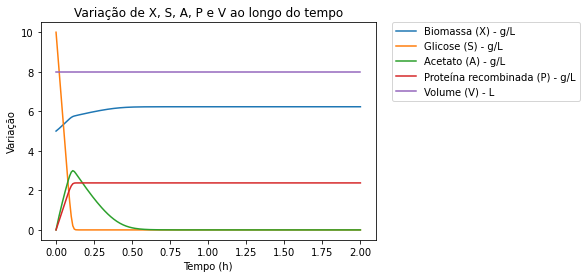

In [45]:
# Initial conditions
Y = [5,10,0,0,8]

# Parameters (Include all parameters required and make sure the function bl21 can unpack them all)
ks = [3.164,25.22,10.90,6.382,1.074,11.89,6.098,1.283,19.01,6.576,10.0]
Ks=[0.7,0.6,0.9]
umax=[0.5,0.75,0.4]
params = ks, umax, Ks
u=[]
u.append(umax[0]*Y[1]/(Ks[0]+Y[1]))
u.append(umax[1]*Y[1]/(Ks[1]+Y[1]))
u.append(umax[2]*Y[2]/(Ks[2]+Y[2]))
  

# Initial time
t0 = 0

# ode
'''
consider scipy.integrate.ode method, with the integrator lsoda and method bdf
you should apply the initial values and parameters
'''
r = ode(bl21).set_integrator('lsoda', method='bdf')  #resolução do sistema de odes
r.set_initial_value(Y,t0).set_f_params(params)

# Final time and step
t1 = 2
dt = 0.01  #tamanho dos passos

num_steps=np.floor((t1-t0)/dt)+1  #cálculo de passos

#Consider creating some storing variables (T and Y)
t=np.zeros((int(num_steps),1))
#Y=np.zeros((int(num_steps), 1)) 

X=np.zeros((int(num_steps), 1))
S=np.zeros((int(num_steps), 1))
A=np.zeros((int(num_steps), 1))
P=np.zeros((int(num_steps), 1))
V=np.zeros((int(num_steps), 1))

t[0]=0
X[0]=Y[0]  #x->5  na primeira linha e 0 nas restantes
S[0]=Y[1]  #S->10
A[0]=Y[2]  #A->0
P[0]=Y[3]  #P->0
V[0]=Y[4]  #V->8
# Solve ode for the time step
'''
see scipy docs on how to resolve the ode for the time steps
append the results to the storing variables
'''
k=1
while r.successful() and k < num_steps:  #calcular a ode tendo em consideração o passo
    r.integrate(r.t+dt)
    t[k] = r.t
    X[k] = r.y[0]  #calcula os valores de x na ode considerando as condições iniciais
    S[k] = r.y[1]
    A[k] = r.y[2]
    P[k] = r.y[3]
    V[k] = r.y[4]
    k+=1

# Plotting
#T = np.array([0]+T)
#Y = np.array([y0]+Y)

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(t, X, label = "Biomassa (X) - g/L")
ax.plot(t, S, label = "Glicose (S) - g/L")
ax.plot(t, A, label = "Acetato (A) - g/L")
ax.plot(t, P, label = "Proteína recombinada (P) - g/L")
ax.plot(t, V, label = "Volume (V) - L")
ax.set_xlabel('Tempo (h)')  # Add an x-label to the axes.
ax.set_ylabel('Variação')  # Add a y-label to the axes.
ax.set_title("Variação de X, S, A, P e V ao longo do tempo")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#print('......')
#bl21(t0,Y,params)
# Consider using matplotlib for plotting.


#print('......')
#bl21(t0,Y,params)

#### c) Equações do modelo dinâmico do processo para X, S, A, P e V em modo semi-contínuo (fed-batch).

As equações diferenciais ordinárias para o sistema em modo *fed-batch* são:

$$D = \frac{F_e}{V} $$

$$\frac{d[X]}{dt} = (\mu_1 + \mu_2 + \mu_3) \ [X] - D[X]$$

$$\frac{d[S]}{dt} = - (k_1 \ \mu_1 + k_2 \ \mu_2) \ [X] + D([S_e] - [S])$$

$$\frac{d[A]}{dt} = (k_3 \ \mu_2 - k_4 \ \mu_3 ) \ [X] - \frac{Fe}{V}[A]$$

$$\frac{d[P]}{dt} = k_{11} \ \mu_1 \ [X] - D[P]$$

$$\frac{d[V]}{dt} = Fe$$

#### d) Implementação do modelo em c) e a sua integração para um período de 30 horas de fermentação com um perfil de alimentação constante de 0.5 L/h, considerando os valores iniciais de 5 g/L, 0 g/L, 0 g/L, 0 g/L, 1 L para X, S, A, P e V respetivamente e uma concentração de 250 g/L na solução de alimentação.

In [19]:
def BL21FB(t, Y, params):

    """

    This will be the model for the strain BL21

    :param t: time; This argument should not be altered
    :param Y: initial conditions; array-like data structure (list, tuple, numpy array)
    :param params: parameters; array-like data structure (list, tuple, numpy array)
    :return: K * phi - (D * variables) + zeros; note that numpy.dot() is the standard for matrices multiplication

    """
    
    ks =[3.164,25.22,10.90,6.382,1.074,11.89,6.098,1.283,19.01,6.576,10.0]
    umax=[0.5,0.75,0.4]
    Ks=[0.7,0.6,0.9]
    params = ks, umax, Ks
    u=[]
    u.append(umax[0]*Y[1]/(Ks[0]+Y[1]))
    u.append(umax[1]*Y[1]/(Ks[1]+Y[1]))
    u.append(umax[2]*Y[2]/(Ks[2]+Y[2]))
    So=250
    K= [[1,1,1],[-ks[0],-ks[1],0],[0,ks[2],-ks[3]],[ks[10],0,0],[0,0,0]]
    ux=np.dot(u,Y[0]) #multiplicação miu por X (biomassa)
    K_phi=np.dot(K,ux)
    D=0
    D=0.5/Y[4] #taxa diluição ()        
    D_variables= np.dot(D,Y)
    zeros=np.zeros((len(Y),1))
    res= K_phi-D_variables 
    
    n=len(Y)
    dy_dt=np.zeros((n,1))
    dy_dt[0]=(u[0]+u[1]+u[2])*Y[0]-D*Y[0] #X
    dy_dt[1]=-(ks[0]*u[0]*Y[0])-(ks[1]*u[1]*Y[0])+D*(So-Y[1])#S
    dy_dt[2]=(ks[2]*u[1]*Y[0])-(ks[3]*u[2]*Y[0])-D*Y[2] #A
    dy_dt[3]=ks[10]*u[0]*Y[0]-D*Y[3] #P
    dy_dt[4]=0.5 #V
    return dy_dt

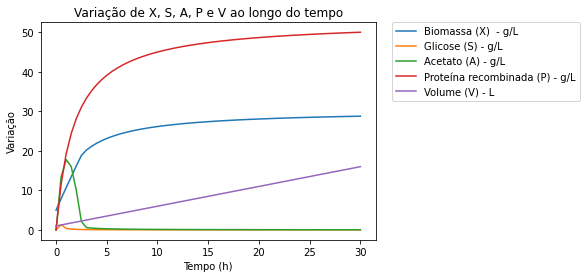

In [30]:
# Initial conditions
y0 = [5,0,0,0,1] #X,S,A,P,V

# Parameters (Include all parameters required and make sure the function bl21 can unpack them all)

ks =[3.164,25.22,10.90,6.382,1.074,11.89,6.098,1.283,19.01,6.576,10.0]
umax=[0.5,0.75,0.4]
Ks=[0.7,0.6,0.9] 
params = ks, umax, Ks
u=[]
u.append(umax[0]*y0[1]/Ks[0]+y0[1]) #u1
u.append(umax[1]*y0[1]/Ks[1]+y0[1]) #u2
u.append(umax[2]*y0[4]/Ks[2]+y0[4]) #u3


# Initial time
t0 = 0

# ode
# consider scipy.integrate.ode method, with the integrator lsoda and method bdf
r = ode(BL21FB).set_integrator('lsoda', method='bdf')
# you should apply the initial values and parameters
r.set_initial_value(y0,t0).set_f_params(params)

# Final time and step
t1 = 30
dt = 0.5

# Solve ode for the time step
num_steps=np.floor((t1-t0)/dt)+1

# Consider creating some storing variables (T and Y)
t=np.zeros((int(num_steps),1))
#Y=np.zeros((int(num_steps), 1)) 

X=np.zeros((int(num_steps), 1))
S=np.zeros((int(num_steps), 1))
A=np.zeros((int(num_steps), 1))
P=np.zeros((int(num_steps), 1))
V=np.zeros((int(num_steps), 1))

t[0]=0
X[0]=y0[0]
S[0]=y0[1]
A[0]=y0[2]
P[0]=y0[3]
V[0]=y0[4]

#condições iniciais
# Solve ode for the time step

k=1
while r.successful() and k< num_steps:
    r.integrate(r.t+dt)
    
    t[k] = r.t
    X[k] = r.y[0]
    S[k] = r.y[1]
    A[k] = r.y[2]
    P[k] = r.y[3]
    V[k] = r.y[4]
    k+=1



# see scipy docs on how to resolve the ode for the time steps
# append the results to the storing variables


# Plotting
# T = np.array([0]+T)
# Y = np.array([y0]+Y)

# Consider using matplotlib for plotting. Perform the introductory tutorial (5-10 minutes)

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(t, X, label = "Biomassa (X)  - g/L")
ax.plot(t, S, label = "Glicose (S) - g/L")
ax.plot(t, A, label = "Acetato (A) - g/L")
ax.plot(t, P, label = "Proteína recombinada (P) - g/L")
ax.plot(t, V, label = "Volume (V) - L")
ax.set_xlabel('Tempo (h)')  # Add an x-label to the axes.
ax.set_ylabel('Variação')  # Add a y-label to the axes.
ax.set_title("Variação de X, S, A, P e V ao longo do tempo")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#print('......')
#BL21FB(t0,y0,params)

#### e) No laboratório é utilizado uma nova estirpe de $\it{E. coli}$ (JM109) que tem um comportamento ligeiramente diferente da inicial (BL21). Foi cultivada em modo $\it{fed-batch}$ com um perfil de alimentação constante de 0.4 L/h.
Comparação gráfica dos dados experimentais da nova estirpe com os previstos com o seu modelo (construído para a estirpe BL21) e formulação do problema de estimação dos parâmetros k2, μmax2 e Ks2.

Criar modelo para a bactéria JM109

In [31]:
def JM109(t, Y, params):
    ks =[3.164,25.22,10.90,6.382,1.074,11.89,6.098,1.283,19.01,6.576,10.0]
    umax=[0.5,0.75,0.4]
    Ks=[0.7,0.6,0.9]
    u=[]
    u.append(umax[0]*Y[1]/(Ks[0]+Y[1]))
    u.append(umax[1]*Y[1]/(Ks[1]+Y[1]))
    u.append(umax[2]*Y[2]/(Ks[2]+Y[2]))
    So=250
    K= [[1,1,1],[-ks[0],-ks[1],0],[0,ks[2],-ks[3]],[ks[10],0,0],[0,0,0]]
    ux=np.dot(u,Y[0]) #multiplicação miu por X (biomassa)
    K_phi=np.dot(K,ux)
    D=0
    D=0.4/Y[4] #taxa diluição ()        
    D_variables= np.dot(D,Y)
    zeros=np.zeros((len(Y),1))
    res= K_phi-D_variables 
    
    n=len(Y)
    dy_dt=np.zeros((n,1))
    dy_dt[0]=(u[0]+u[1]+u[2])*Y[0]-D*Y[0] #X
    dy_dt[1]=-(ks[0]*u[0]*Y[0])-(ks[1]*u[1]*Y[0])+D*(So-Y[1])#S
    dy_dt[2]=(ks[2]*u[1]*Y[0])-(ks[3]*u[2]*Y[0])-D*Y[2] #A
    dy_dt[3]=ks[10]*u[0]*Y[0]-D*Y[3] #P
    dy_dt[4]=0.4 #V
    return dy_dt
    

In [32]:
df = pd.read_csv (r'/Users/danielalemos/Desktop/Universidade/2º Semestre/Modelação/trabalho/dados_exp.csv', delimiter=';')

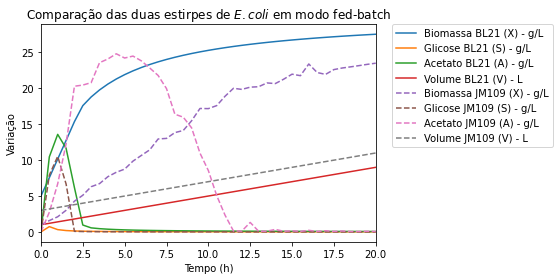

In [48]:
y0 = [5,0,0,0,1] #X,S,A,P,V

# Parameters (Include all parameters required and make sure the function bl21 can unpack them all)
ks =[3.164,25.22,10.90,6.382,1.074,11.89,6.098,1.283,19.01,6.576,10.0]
umax=[0.5,0.75,0.4]
Ks=[0.7,0.6,0.9] 
u=[]
u.append(umax[0]*(y0[1]/Ks[0]+y0[1])) #u1
u.append(umax[1]*y0[1]/Ks[1]+y0[1]) #u2
u.append(umax[2]*y0[4]/Ks[2]+y0[4]) #u3


# Initial time
t0 = 0

# ode
# consider scipy.integrate.ode method, with the integrator lsoda and method bdf
r = ode(JM109).set_integrator('lsoda', method='bdf')
# you should apply the initial values and parameters
r.set_initial_value(y0,t0).set_f_params(params)

# Final time and step
t1 = 30
dt = 0.5

# Solve ode for the time step
num_steps=41
#print(num_steps)

# Consider creating some storing variables (T and Y)
t=np.zeros((int(num_steps),1))


#Y=np.zeros((int(num_steps), 1)) 

X=np.zeros((int(num_steps), 1))
S=np.zeros((int(num_steps), 1))
A=np.zeros((int(num_steps), 1))
P=np.zeros((int(num_steps), 1))
V=np.zeros((int(num_steps), 1))

X2 = df.X
S2 = df.S
A2 = df.A
V2 = df.V


t[0]=0
X[0]=y0[0]
S[0]=y0[1]
A[0]=y0[2]
P[0]=y0[3]
V[0]=y0[4]

#condições iniciais
# Solve ode for the time step
#print(t[0])
k=1
while r.successful() and k< num_steps:
    r.integrate(r.t+dt)
    
    t[k] = r.t
    X[k] = r.y[0]
    S[k] = r.y[1]
    A[k] = r.y[2]
    P[k] = r.y[3]
    V[k] = r.y[4]
    k+=1


# see scipy docs on how to resolve the ode for the time steps
# append the results to the storing variables


# Plotting
# T = np.array([0]+T)
# Y = np.array([y0]+Y)

# Consider using matplotlib for plotting. Perform the introductory tutorial (5-10 minutes)

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(t, X, label='Biomassa BL21 (X) - g/L')  # Plot some data on the axes.
ax.plot(t, S, label='Glicose BL21 (S) - g/L')  # Plot more data on the axes...
ax.plot(t, A, label='Acetato BL21 (A) - g/L')  # ... and some more.
#ax.plot(t, P, label='Proteína recombinada BL21 (P) - g/L')  # ... and some more.
ax.plot(t, V, label='Volume BL21 (V) - L')  # ... and some more.

ax.plot(t, X2.array, label='Biomassa JM109 (X) - g/L', linestyle='dashed')  # Plot some data on the axes.
ax.plot(t, S2, label='Glicose JM109 (S) - g/L', linestyle='dashed')  # Plot more data on the axes...
ax.plot(t, A2, label='Acetato JM109 (A) - g/L', linestyle='dashed')  # ... and some more.
ax.plot(t, V2, label='Volume JM109 (V) - L', linestyle='dashed')  # ... and some more.

ax.set_xlabel('Tempo (h)')  # Add an x-label to the axes.
ax.set_xlim([0, 20])
ax.set_ylabel('Variação')  # Add a y-label to the axes.
ax.set_title("Comparação das duas estirpes de $\it{E.coli}$ em modo fed-batch")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#print('......')
#JM109(t0,y0,params)



In [34]:
def JM109E(t, Y, params):
    """

    This will be the model for the strain JM109 which is similar to the BL21, but it should have slight modifications

    :param t: time; This argument should not be altered
    :param Y: initial conditions; array-like data structure (list, tuple, numpy array)
    :param params: parameters; array-like data structure (list, tuple, numpy array) - NOTE THAT THESE ARGUMENT MUST
    CONTAIN ONLY AND ONLY THOSE PARAMETERS TO BE ESTIMATED. The remain parameters should be hardcoded within the
    function
    :return: K * phi - (D * variables) + zeros; note that numpy.dot() is the standard for matrices multiplication

    """
    
    k2, umax2, Ks2 = params
    
    ks = [3.164, k2, 10.90, 6.382, 1.074, 11.89, 6.098, 1.283, 19.01, 6.576, 10.0]
    umax = [0.5, umax2, 0.4]
    Ks = [0.7, Ks2, 0.9] 
    
    Fe = 0.4
    
    Se = 250
    
    u = []
    
    u.append((umax[0]*Y[1])/(Ks[0]+Y[1]))
    u.append((umax2*Y[1])/(Ks2+Y[1]))
    u.append((umax[2]*Y[2])/(Ks[2]+Y[2]))
    
    u = np.array(u).reshape(3,1)  #alterar vetor linha para vetor coluna
    
    D = Fe/Y[4]  #calcular diluição
    
    K = np.array([[1, 1, 1],[-ks[0], -k2, 0], [0, ks[2], -6.382], [ks[10], 0, 0], [0, 0, 0]])
    
    conversao = np.dot(K, u*Y[0])
    
    entrada = np.array([0, Se*D, 0, 0, Fe]).reshape(5,1)
    
    c = np.array([Y[0], Y[1], Y[2], Y[3], 0]).reshape(5,1)
    
    diluicao = np.dot(D, c)
    
    return conversao + entrada - diluicao


Criar função para estimação dos parâmetros

In [35]:
def estimate(params):

    """

    This will be our estimate function that works out as the calculation of the difference between the experimental
    and predicted values and can be used as the objective function

    :param params: parameters; array-like data structure (list, tuple, numpy array) for the ode
    :return: the error between measured and predicted data, i.e. difS + difX + difA + difV
    """


    # Consider using global to access and change global variables outside of this function
    # Otherwise, model, time, initial conditions and experimental data can be hardcoded here within the function
    # Nevertheless, use always the global Y (array to store the results) to re-write this variable with new results
    global model
    global t
    global dados_exp
    global y0
    global Y

    # timespan (initial, final, step)
    # Initial time
    t0 = t[0]

    # Initial conditions
    y0 = y0
    # Final time and step
    t1 = t[1]
    dt = t[2]   #nº de linhas dos dados experimentais
    # ode
    # consider scipy.integrate.ode method, with the integrator lsoda and method bdf
    # you should apply the initial values and parameters

    r = ode(model).set_integrator('lsoda', method='bdf') 
    r.set_initial_value(y0,t0).set_f_params(params)

    # Using the global storing variable Y

    # Solve ode for the time step
    # see scipy docs on how to resolve the ode for the time steps
    # append the results to the Y storing variable

    # Consider the metrics to calculate the error between experimental and predicted data
    a = 0
    #print('y',len(Y))
    while r.successful() and r.t < t1 and a<40:
        a += 1
        #print('a',a)
        Y[a,:]=r.integrate(r.t+dt)

    # Remove the set o P concentrations values calculated from the model, as we have no experimental data to confirm it
  
    y_comparable = np.delete(Y,3,1)
  
    # Consider the metrics to calculate the error between experimental and predicted data
    return sum([dst.sqeuclidean(dados_exp.iloc[:,n+1], y_comparable[:,n]) for n in range(4)])


In [36]:
# Bounds
# Consider using the following class for setting the Simulated Annealing bounds
class Bounds(object):

    def __init__(self, LB=None, UB=None):

        if LB is None:
            LB = [25,0.7,0.5]

        if UB is None:
            UB = [26,0.8,0.7]

        self.lower_bound = np.array(LB)
        self.upper_bound = np.array(UB)

    def __call__(self, **kwargs):

        x = kwargs["x_new"]

        tmax = bool(np.all(x <= self.upper_bound))
        tmin = bool(np.all(x >= self.lower_bound))

        return tmax and tmin

In [37]:
model = JM109E

t = (0,30,0.75)

dados_exp = pd.read_csv (r'/Users/danielalemos/Desktop/Universidade/2º Semestre/Modelação/trabalho/dados_exp.csv', delimiter=';')

y0 = [5,0,0,0,1] 

Y = np.zeros((41,5))  #41-nºlinhas csv 4-nºcolunas

Y[0,:] = y0



#Bounds
LB = [25,0.7,0.5]
UB = [26,0.8,0.7]
bounds = Bounds(LB, UB)
b = ((LB[0],UB[0]),(LB[1],UB[1]),(LB[2],UB[2]))

# initial guess, that is the initial values for the parameters to be estimated. It can be those available in the pdf
x0 = [25.22, 0.75, 0.6]  #ks2,umax2,Ks2

# Simulated Annealing
# consider scipy.optimize.basinhopping method, with the method BFGS, niter 200, seed 1 and the respective bounds.
# To perform some testing consider lowering the number of iterations to 10, as SA can take a while


minimizer_kwargs = {"method": "L-BFGS-B", "bounds": b}
ret = basinhopping(estimate, x0, minimizer_kwargs = minimizer_kwargs, niter = 10, seed = 1, accept_test = bounds)

print(f"Mínimo global: ks2 = {ret.x[0]}, miu_max2 = {ret.x[1]}, Ks2 = {ret.x[2]}")
# Consider using matplotlib for plotting.

Mínimo global: ks2 = 25.999999793122857, miu_max2 = 0.7999999793126232, Ks2 = 0.5000000413745578


Text(0.5, 1.0, 'Modelo de JM109, estimado e experimental')

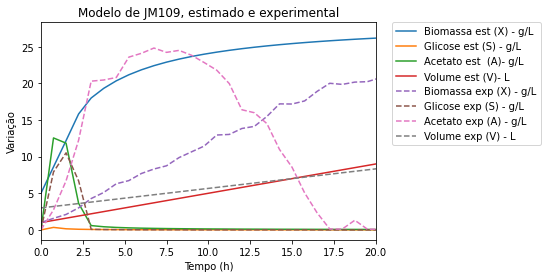

In [46]:
# Initial conditions
y0 = [5,0,0,0,1]

# Parameters (Include all parameters required and make sure the function bl21 can unpack them all)
k2, umax2, ks2 = 25.999999793122857,0.7999999793126232, 0.5000000413745578
params = [k2, umax2, ks2]

# Initial time
t0 = 0

# ode
'''
consider scipy.integrate.ode method, with the integrator lsoda and method bdf
you should apply the initial values and parameters
'''

r = ode(JM109E).set_integrator('lsoda', method='bdf')
r.set_initial_value(y0, t0).set_f_params(params)

# Final time and step
t1 = 30
dt = 0.75

#Consider creating some storing variables (T and Y)
T, Y = [], []

# Solve ode for the time step
'''
see scipy docs on how to resolve the ode for the time steps
append the results to the storing variables
'''
while r.successful() and r.t < t1:
	T.append(r.t+dt), Y.append(r.integrate(r.t+dt))

# Plotting
T = np.array([0]+T)
Y = np.array([y0]+Y)
labels = ['Biomassa - g/L', 'Glicose - g/L', 'Acetato - g/L', 'Volume - L']
colors = ['b', 'r', 'g', 'c']

# remove PR
y = np.delete(Y,3,1)

X2 = dados_exp.X
S2 = dados_exp.S
A2 = dados_exp.A
V2 = dados_exp.V


fig, ax = plt.subplots()

ax.plot(T, y[:,0], label = "Biomassa est (X) - g/L")
ax.plot(T, y[:,1], label = "Glicose est (S) - g/L")
ax.plot(T, y[:,2], label = "Acetato est  (A)- g/L")
ax.plot(T, y[:,3], label = "Volume est (V)- L")

ax.plot(T, X2, label='Biomassa exp (X) - g/L', linestyle='dashed')  # Plot some data on the axes.
ax.plot(T, S2, label='Glicose exp (S) - g/L', linestyle='dashed')  # Plot more data on the axes...
ax.plot(T, A2, label='Acetato exp (A) - g/L', linestyle='dashed')  # ... and some more.
ax.plot(T, V2, label='Volume exp (V) - L', linestyle='dashed')  # ... and some more.
ax.set_xlim([0, 20])
ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Tempo (h)")
ax.set_ylabel("Variação")
ax.set_title("Modelo de JM109, estimado e experimental")


#### f) Sensibilidades ao longo do tempo das variáveis X e S aos parâmetros k4, μmax2 e Ks3.

Text(0.5, 0, 'Tempo (h)')

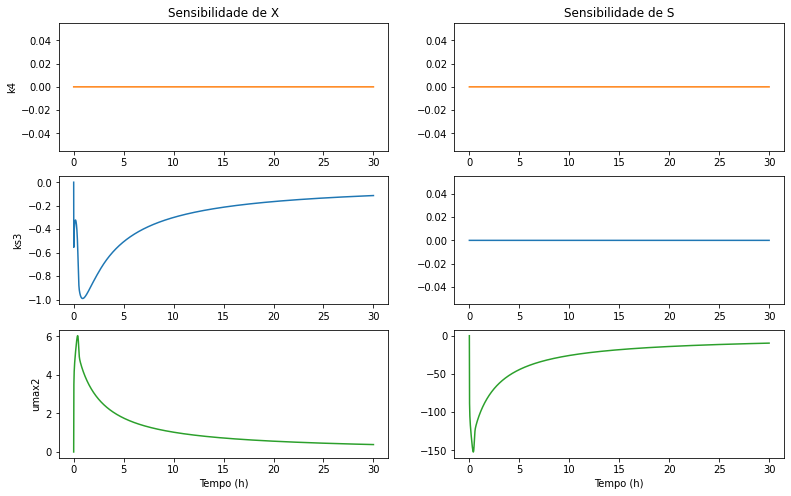

In [41]:
y0 = [5, 0, 0, 0, 1] #initial conditions
Fe = 0.4  #fluxo de entrada
Se = 250  #substrato de entrada
v0 = 1    #volume

# k parameters except k4
params = [3.164,25.22,10.90,1.074,11.89,6.098,1.283,19.01,6.576,10.0]

# mu's except umax2
umax=[0.5,0.4]

# Ks’s except ks3
ks=[0.7,0.6]

# Consider using sympy.symbols to create algebric variables to be used on the derivatives (X, S, k1, ks1, ...)
X, S, A, P, umax2, k4, ks3, V = sp.symbols('X S A P umax2 k4 ks3 V')
D = Fe/V #calculo da diuluiçao

# mu’s
u1 = (umax[0]*S)/(ks[0]+S)
u2 = (umax2*S)/(ks[1]+S)
u3 = (umax[1]*S)/(ks3+S)

# ordinary differential equations DX and DS
dxdt = (u1 + u2 + u3)*X - D*X
dsdt = -(params[0] * u1 * X) - (params[1] * u2 * X) + D * (Se - S)
dadt = (params[2] * u2 * X) - (k4 * u3 * X)- D * A
dpdt = params[9] * u1 * X - D * P


# perform the derivatives in order at k4, umax2 and ks3. Consider using sympy's method: diff
dXk4 = sp.diff(dxdt, k4)
dXks3 = sp.diff(dxdt, ks3)
dXumax2 = sp.diff(dxdt, umax2)

dSk4 = sp.diff(dsdt, k4)
dSks3 = sp.diff(dsdt, ks3)
dSumax2 = sp.diff(dsdt, umax2)

dAk4 = sp.diff(dadt, k4)
dAks3 = sp.diff(dadt, ks3)
dAumax2 = sp.diff(dadt, umax2)

dPk4 = sp.diff(dpdt, k4)
dPks3 = sp.diff(dpdt, ks3)
dPumax2 = sp.diff(dpdt, umax2)

# transform the derivates expression into lambda functions to calculate the sensitivity values of each
# derivate form. Consider using sympy lambdify where the args of the lambda function are the algebric variables in the
# derivate expression. Choose the numpy module for the calculations
dXk4_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dXk4, 'numpy')
dXks3_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dXks3, 'numpy')
dXumax2_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dXumax2, 'numpy')

dSk4_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dSk4, 'numpy')
dSks3_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dSks3, 'numpy')
dSumax2_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dSumax2, 'numpy')

dAk4_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dAk4, 'numpy')
dAks3_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dAks3, 'numpy')
dAumax2_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dAumax2, 'numpy')

dPk4_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dPk4, 'numpy')
dPks3_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dPks3, 'numpy')
dPumax2_ = sp.lambdify((X, S, A, P, k4, ks3, umax2), dPumax2, 'numpy')

# Final time and step
t1 = 30
dim = int(t1/dt) + 1  #dimensao do array/nºlinhas
T = np.zeros((dim,1))
T[0] = t0

dt = 0.01  #passo
k4 = 6.382
umax2 = 0.75
ks3 = 0.9

param = [[params[0],params[1],params[2],k4,params[3],params[4],params[5],params[6],params[7],params[8],params[9]],[umax[0],umax2,umax[1]],[ks[0],ks[1],ks3], Fe, v0, Se]

# ode
# consider scipy.integrate.ode method, with the integrator lsoda and method bdf
# you should apply the initial values and parameters
r = ode(BL21FB).set_integrator('lsoda', method = 'bdf')
r.set_initial_value(y0, t0).set_f_params(param)

# Using the global storing variable Y
Y = np.zeros((dim,5))
Y[0,:] = y0


# Solve ode for the time step
# see scipy docs on how to resolve the ode for the time steps
# append the results to the Y storing variable

i = 1
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    T[i] =  r.t
    Y[i,:] = [r.y[0], r.y[1], r.y[2], r.y[3], r.y[4]]
    i+=1

# redeclaration of k4, umax2, ks3, X, S for the ode results or values in the pdf file
X = Y[:,0] #extrai a coluna do X da matriz obtida anteriormente
S = Y[:,1]
A = Y[:,2]
P = Y[:,3]

# create the dx and ds arrays executing the lambda function for the X, S, k1, umax1, ks1 values
dx = np.zeros((dim,3))
ds = np.zeros((dim,3))
da = np.zeros((dim,3))
dp = np.zeros((dim,3))

# create the time array. Hint: np.arange(timespan)
for v in range(len(S)):
    dx[v,0] = dXk4_(X[v],S[v],A[v],P[v],k4,ks3,umax2)
    dx[v,1] = dXks3_(X[v],S[v],A[v],P[v],k4,ks3,umax2)
    dx[v,2] = dXumax2_(X[v],S[v],A[v],P[v],k4,ks3,umax2)
    
    ds[v,0] = dSk4_(X[v],S[v],A[v],P[v],k4,ks3,umax2)
    ds[v,1] = dSks3_(X[v],S[v],A[v],P[v],k4,ks3,umax2)
    ds[v,2] = dSumax2_(X[v],S[v],A[v],P[v],k4,ks3,umax2)

    da[v,0] = dAk4_(X[v],S[v],A[v],P[v],k4,ks3,umax2)
    da[v,1] = dAks3_(X[v],S[v],A[v],P[v],k4,ks3,umax2)
    da[v,2] = dAumax2_(X[v],S[v],A[v],P[v],k4,ks3,umax2)

    dp[v,0] = dPk4_(X[v],S[v],A[v],P[v],k4,ks3,umax2)
    dp[v,1] = dPks3_(X[v],S[v],A[v],P[v],k4,ks3,umax2)
    dp[v,2] = dPumax2_(X[v],S[v],A[v],P[v],k4,ks3,umax2)
 

# Consider using matplotlib for plotting.
fig, ax = plt.subplots(3, 2, figsize = (13,8))  # figura + eixos (tamanho da janela)
ax[0,0].plot(T, dx[:,0], 'tab:orange')
ax[1,0].plot(T, dx[:,1], 'tab:blue')
ax[2,0].plot(T, dx[:,2], 'tab:green')
ax[0,1].plot(T, ds[:,0], 'tab:orange')
ax[1,1].plot(T, ds[:,1], 'tab:blue')
ax[2,1].plot(T, ds[:,2], 'tab:green')

ax[0,0].set_title('Sensibilidade de X')
ax[0,1].set_title('Sensibilidade de S')

ax[0,0].set_ylabel('k4')
ax[1,0].set_ylabel('ks3')
ax[2,0].set_ylabel('umax2')
ax[2,0].set_xlabel('Tempo (h)')
ax[2,1].set_xlabel('Tempo (h)')


#### g) Derivação do sistema em quimiostato,considerando o caudal de entrada Fe igual ao usado no modo semi-contínuo e assumindo, um o volume fixo e igual a 6 L.

Determinação do estado estacionário e a estabilidade do sistema no estado estacionário para as situações em que não há biomassa e em que o valor da biomassa é maior que 0.


As equações que representam o sistema em quimiostato são:

$$\frac{d[X]}{dt} = (\mu_1 + \mu_2 + \mu_3) \ [X] - \frac{Fe}{V}[X]$$

$$\frac{d[S]}{dt} = - (k_1 \ \mu_1 + k_2 \ \mu_2) \ [X] + \frac{Fe}{V}[S_e] - \frac{Fe}{V}[S]$$

$$\frac{d[A]}{dt} = (k_3 \ \mu_2 - k_4 \ \mu_3 ) \ [X] - \frac{Fe}{V}[A]$$

$$\frac{d[P]}{dt} = k_{11} \ \mu_1 \ [X] - \frac{Fe}{V}[P]$$

$$\frac{d[V]}{dt} = 0$$

In [43]:
def chemostate(y0):
    """

    This will be the model for the chemostate

    :param y: variables; array-like data structure (list, tuple, numpy array)
    :return: np.array with model equations
    
    """
    # Condicoes iniciais
    X = y0[0]
    S = y0[1]
    A = y0[2]
    P = y0[3]

    #Parametros
    params = [3.164,25.22,10.90,6.382,1.074,11.89,6.098,1.283,19.01,6.576,10.0]
    umax=[0.5,0.75,0.4]
    ks=[0.7,0.6,0.9]
    Fin=0.5
    V=6
    #X, S, A, P, V, k1, k2, k3, k4, k11, Fin, Se = symbols('X,S,A,P,V,k1,k2,k3,k4,k11,Fin,Se')
    #Equacoes
    u1=umax[0]*(S/(ks[0]+S))
    u2=umax[1]*(S/(ks[1]+S))
    u3=umax[2]*(A/(ks[2]+A))

    return np.array([u1 * X + u2 * X + u3 * X - Fin/V * X,
- params[0] * u1 * X - params[1] * u2 * X + Fin/V * Se - Fin/V * S,
params[2] * u2 * X - params[3] * u3 * X - Fin/V * A,
params[10] * u1 * X - Fin/V * P])

# Solve the chemostate model using fsolve to find the stationary states
# See scipy docs on how to call fsolve function
# Solve for no biomass

print("Sem Biomassa")
y0 = np.array([0,0,0,0])
a = fsolve(chemostate, y0)
print("Ponto:",a)

jacob = nd.Jacobian(chemostate)
print('\n',"Sem Biomassa")
print("Jacobiano:", "\n", jacob(a))
print("Traço:", np.trace(jacob(a)))
print("Determinante:", np.linalg.det(jacob(a)))

print('\n',"Existe Biomassa")
y0 = np.array([5,0,0,0])
b = fsolve(chemostate, y0)
print("Ponto:",b)


#Find the jacobian for the model using the Jacobian function from numdifftools
#Calculate the trace and determinant for each stationary state using numpy functions
print()
print("Existe Biomassa")
print("Jacobiano:", "\n",jacob(b))
print("Traço:", np.trace(jacob(b)))
print("Determinante:",np.linalg.det(jacob(b)))

#Conclude about the stability of the steady states  

Sem Biomassa
Ponto: [  0. 250.   0.   0.]

 Sem Biomassa
Jacobiano: 
 [[  1.16347489   0.           0.           0.        ]
 [-20.44729546  -0.08333333   0.           0.        ]
 [  8.15542698   0.          -0.08333333   0.        ]
 [  4.98603909   0.           0.          -0.08333333]]
Traço: 0.9134748853780739
Determinante: -0.0006733072253350833

 Existe Biomassa
Ponto: [3.03290997e+01 2.10359950e-02 1.09369399e-01 5.30905082e+01]

Existe Biomassa
Jacobiano: 
 [[-7.87450406e-13  5.58045937e+01  1.07167167e+01  0.00000000e+00]
 [-6.86851260e-01 -9.57135289e+02  0.00000000e+00  0.00000000e+00]
 [ 3.00507338e-04  3.85713629e+02 -6.84774194e+01  0.00000000e+00]
 [ 1.45873404e-01  2.04180222e+02  0.00000000e+00 -8.33333333e-02]]
Traço: -1025.6960415915084
Determinante: 455.06474690441826
